In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
tables = soup.find_all('table')

In [ ]:
headers = soup.find_all('th')[0:4]
headers = [ele.text.strip() for ele in headers]

In [ ]:
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
df = pd.DataFrame(data, columns=headers)

In [ ]:
df.to_csv('C:\lok_sabha_results.csv', index=False)

lok_sabha_results = pd.read_csv('C:\lok_sabha_results.csv')
heatmap_data = lok_sabha_results[['Party', 'Won']].set_index('Party')

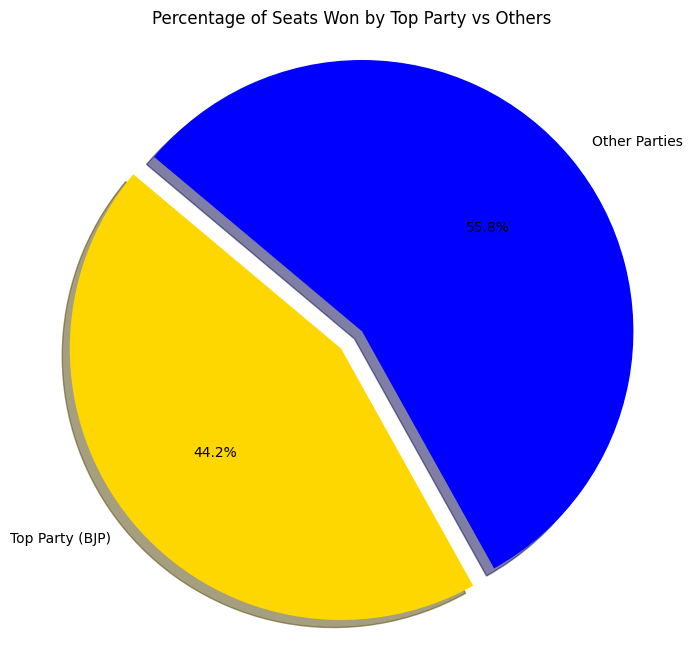

In [ ]:
top_party_seats = lok_sabha_results['Won'].max()
other_parties_seats = lok_sabha_results['Won'].sum() - top_party_seats
labels = ['Top Party (BJP)', 'Other Parties']
sizes = [top_party_seats, other_parties_seats]
colors = ['gold', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Seats Won by Top Party vs Others')
plt.axis('equal')
plt.savefig('percentage_seats_top_party.png')
plt.show()


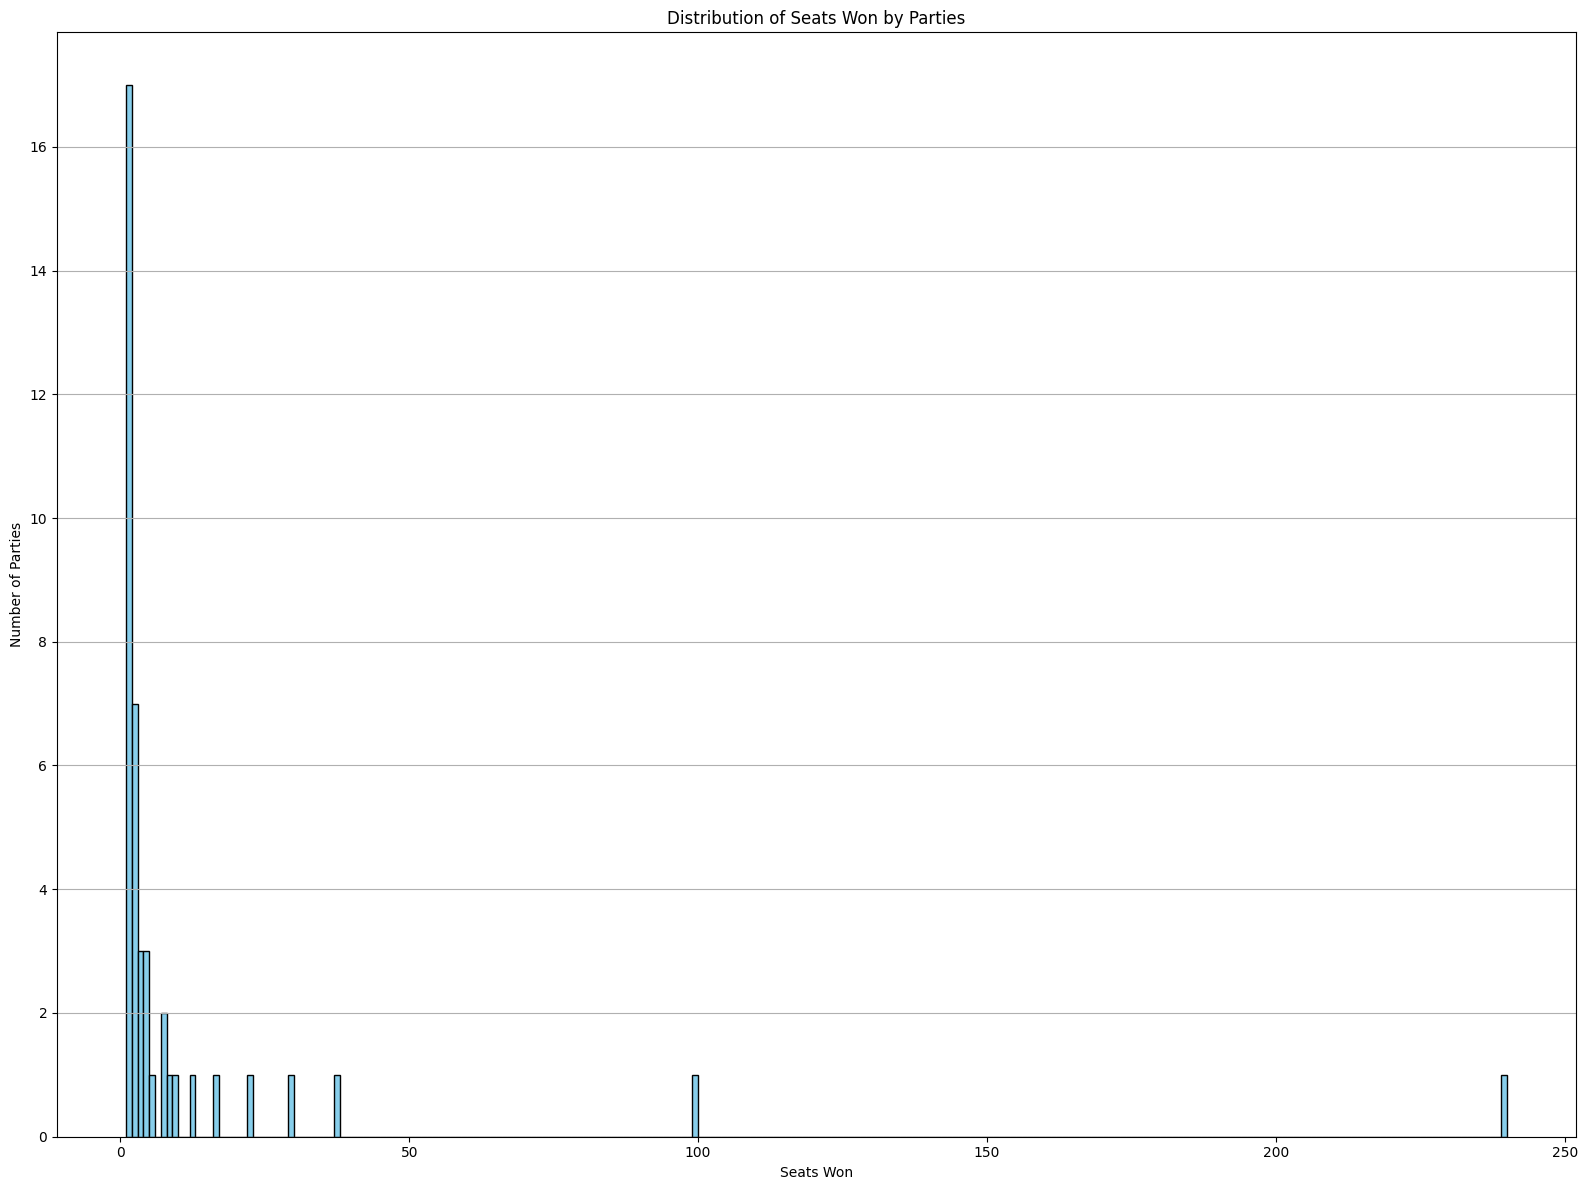

In [ ]:
plt.figure(figsize=(16, 12))
plt.hist(lok_sabha_results['Won'], bins=range(1, int(lok_sabha_results['Won'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Seats Won')
plt.ylabel('Number of Parties')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('seats_distribution.png')
plt.show()


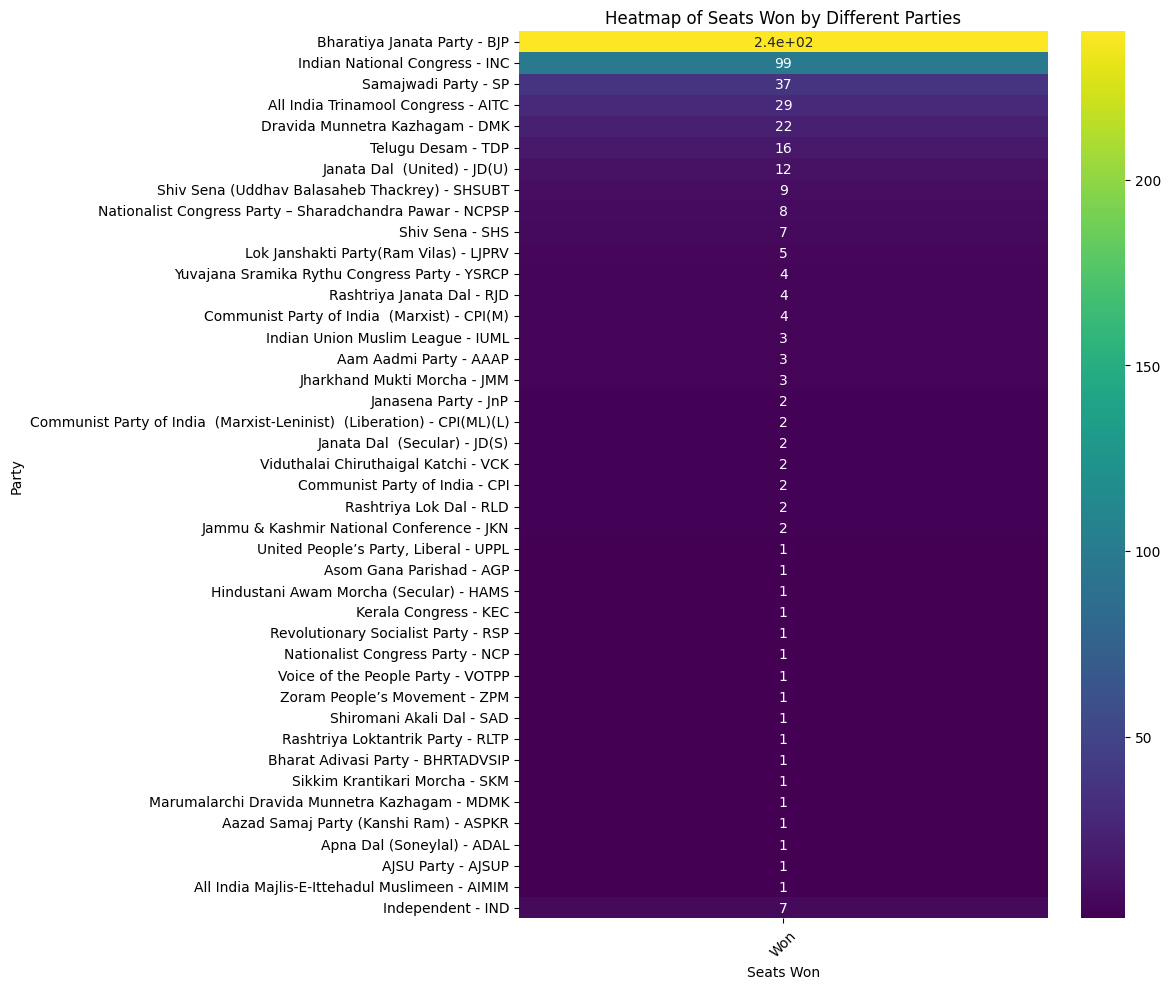

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True)
plt.title('Heatmap of Seats Won by Different Parties')
plt.ylabel('Party')
plt.xlabel('Seats Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seats_won_heatmap.png')
plt.show()

In [ ]:

summary = lok_sabha_results.describe()
print("Total_Parties:",lok_sabha_results.shape[0])

total_seats_won = lok_sabha_results['Won'].sum()
print("Total_seats:",total_seats_won)

parties_with_seats = lok_sabha_results[lok_sabha_results['Won'] > 0].shape[0]
print("Number_of_party_seats:",parties_with_seats)

top_5_parties = lok_sabha_results.nlargest(5, 'Won')
print("5_top_parties:",top_5_parties)

top_party_percentage = (lok_sabha_results['Won'].max() / total_seats_won) * 100
print("Percentage:",top_party_percentage)

least_seats_party = lok_sabha_results[lok_sabha_results['Won'] == lok_sabha_results['Won'].min()]
print("Least_number_of_seats:",least_seats_party)


Total_Parties: 42
Total_seats: 543.0
Number_of_party_seats: 42
5_top_parties:                                  Party    Won  Leading  Total
0         Bharatiya Janata Party - BJP  240.0      0.0  240.0
1       Indian National Congress - INC   99.0      0.0   99.0
2                 Samajwadi Party - SP   37.0      0.0   37.0
3  All India Trinamool Congress - AITC   29.0      0.0   29.0
4      Dravida Munnetra Kazhagam - DMK   22.0      0.0   22.0
Percentage: 44.19889502762431
Least_number_of_seats:                                              Party  Won  Leading  Total
24           United People’s Party, Liberal - UPPL  1.0      0.0    1.0
25                        Asom Gana Parishad - AGP  1.0      0.0    1.0
26         Hindustani Awam Morcha (Secular) - HAMS  1.0      0.0    1.0
27                           Kerala Congress - KEC  1.0      0.0    1.0
28             Revolutionary Socialist Party - RSP  1.0      0.0    1.0
29                Nationalist Congress Party - NCP  1.0      0.0 

10 Key Insights

1.BJP-led NDA Majority: The Bharatiya Janata Party (BJP)-led National Democratic Alliance (NDA) secured a majority by winning 240 seats out of the total 542 constituencies1. Prime Minister Narendra Modi is set to serve for a third consecutive term.

2.Congress Performance: The Congress party secured 99 seats, marking a decrease from its previous victories in 2019 (303 seats) and 2014 (282 seats)

3.Alliance Contributions: The NDA’s majority was bolstered by alliance partners, including Chandrababu Naidu’s Telugu Desam Party (TDP) and Nitish Kumar’s Janata Dal United (JDU), which contributed 52 seats to the tally.

4.Shock Reverses: Despite the overall majority, the NDA faced setbacks in states like Uttar Pradesh, Haryana, Rajasthan, Maharashtra, and West Bengal, losing seats compared to the 2019 polls.

5.Voter Turnout: The mammoth exercise for the 18th Lok Sabha Elections concluded on June 1, with the seventh and final round of voting in 57 constituencies across 8 states and Union Territories. Voter turnout varied across phases, with the highest being approximately 69.16% in the fourth phase.

6.Modi’s Third Term: Exit polls consistently predicted the return of Narendra Modi as Prime Minister for a record third consecutive time1.
7.BJP’s Previous Wins: In the 2019 Lok Sabha Elections, the BJP-led NDA won 353 seats, while the Congress-led UPA secured 93 seats.

8.Overall Seat Distribution: The BJP won 240 seats, Congress secured 99, and other parties accounted for the remaining.

9.Urban-Rural Divide: The election results highlighted a significant urban-rural divide. While the NDA performed well in rural constituencies, it faced challenges in urban areas, where opposition parties gained ground.

10.Reduced Majority: Although the BJP secured a majority, its seat count decreased from previous elections, indicating shifts in voter sentiment and regional dynamics.


